In [24]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

Read S-cubed data

In [25]:
d = fits.open("100sqdeg_1uJy_s1400.fits")[1].data

Compute flux at 144 MHz

In [26]:
alpha = -0.7
flux_144 = 10.**(3+d['itot_151']+(d['itot_1400']-d['itot_151'])/(np.log10(1400/151))*np.log10(144/151))

Compute redshift distributions for different flux cuts

In [27]:
def get_nz(flux_cut, nb=100, zmax=10, use_b=False):
    mask  = flux_144 >= flux_cut
    z = d[mask]['redshift']
    nz, zb = np.histogram(z, bins=nb, range=[0, zmax], density=True)
    # Add zero
    zb[1:] = 0.5 * (zb[1:] + zb[:-1])
    nz = np.concatenate((np.array([0]), nz))
    return zb, nz

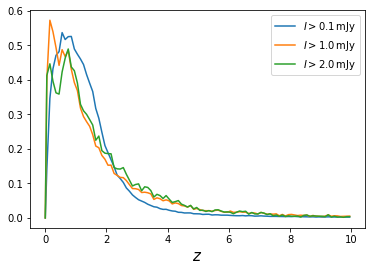

In [28]:
plt.figure()
for fluxcut in [0.1, 1.0, 2.0]:
    zs, nz = get_nz(fluxcut)
    plt.plot(zs, nz,
             label=r'$I>%.1lf\,{\rm mJy}$' % fluxcut)
    np.savez('nz_skads_flux%.3lf' % fluxcut,
             zs=zs, nz=nz)
plt.xlabel('$z$', fontsize=15)
plt.legend(loc='upper right')
plt.show()